In [ ]:
import pandas as pd
from google.colab import  drive
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

import scipy

from sklearn.model_selection import train_test_split






# drive.mount('/drive', force_remount = False)
#check clean data; if dataset is small can use python or scikit


df = pd.read_csv("https://csprojectdatavisualizationsample50k.s3.us-east-2.amazonaws.com/sample_df.csv")
df_columns = df.columns
df_feature_names = (df_columns[1:4]).to_list()
df_features = df.iloc[:,1:4].values
df_label_names = (df_columns[26:30]).to_list()
df_labels = df.iloc[:, 26:30].values
#Input
print(df_label_names)
print(df_feature_names)

# Split our data
train, test, train_labels, test_labels = train_test_split(df_features,
                                                          df_labels,
                                                          test_size=0.25,
                                                          random_state=42)

print(train.shape)
print(test.shape)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(train, train_labels)
result = knn.predict([[0,0,0]])
print(result)
# accuracy on X_test
accuracy = knn.score(train, train_labels)
print(accuracy)
# test = knn.predict()
# print accuracy

# # Initialize our classifier
# gnb = GaussianNB()

# # Train our classifier
# model = gnb.fit(train, train_labels)

# # Make predictions
# preds = gnb.predict(test)
# print(preds)

# # Evaluate accuracy
# print(accuracy_score(test_labels, preds))


['ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG']
['YEAR', 'AGE', 'EDUC']
(37500, 3)
(12500, 3)
[[1 0 0 0]]
0.7543733333333333


#Multilabel Classification Using 

The Adam optimization algorithm is used, as opposed to stochastic gradient descent, which stands for Adaptive Moment Estimation. Unlike stochastic gradients, which use single learning rates, here the Adam algorithm implements both Adaptive Gradient Algorithm and Root Mean Square Propagation. These two mechanisms calculacate an exponential moving average of the gradient and the squared gradient. 

In [ ]:

# mlp for multi-label classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		# define model
		model = get_model(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=20)
		# make a prediction on the test set
		yhat = model.predict(X_test)
		# round probabilities to class labels
		yhat = yhat.round()
		# calculate accuracy
		acc = accuracy_score(y_test, yhat)
		# store result
		print('>%.3f' % acc)
		results.append(acc)
	return results

df = pd.read_csv("https://csprojectdatavisualizationsample50k.s3.us-east-2.amazonaws.com/sample_df.csv")
df_columns = df.columns
df_feature_names = (df_columns[2:5]).to_list()
print(df_feature_names)
df_features = df.iloc[:,2:5].values
df_label_names = (df_columns[26:30]).to_list()
df_labels = df.iloc[:, 26:30].values

# evaluate model
# results = evaluate_model(df_features, df_labels)
# summarize performance
# print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

n_inputs, n_outputs = df_features.shape[1], df_labels.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(df_features, df_labels, verbose=0, epochs=100)
# make a prediction for new data
row = [9, 1, 4]
newX = list([row])
yhat = model.predict(newX)
print('Predicted: %s' % yhat[0])


['AGE', 'EDUC', 'ETHNIC']


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import plotly
import plotly.express as px
from urllib.request import urlopen
import json
import plotly.graph_objects as go
import numpy as np

df = pd.read_csv("https://csprojectdatavisualizationsample50k.s3.us-east-2.amazonaws.com/sample_df.csv")

lat_long_states = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/statelatlong.csv")
us_geo_json = 'https://usgeojson.s3.us-east-2.amazonaws.com/states.geojson'


lat_states_only = list(lat_long_states['Latitude'])
long_states_only = list(lat_long_states['Longitude'])
state_abrs = list(lat_long_states['State'])
state_value_index = list(lat_long_states['Identifier'])


state_lookup_dict = {}
i = 0
while i < len(state_value_index):
  state_abr = state_abrs[i]
  state_value = str(state_value_index[i])
  lat_for_state = lat_states_only[i]
  long_for_state = long_states_only[i]
  state_lookup_dict[state_value] = [state_abr, lat_for_state, long_for_state]
  i+=1

state_lookup_dict['72'] = ['PR', '18.466333', '-66.105721']

def get_coordinates(id, desired_type = 'state_abbreviation'):
  id_to_str = str(id)
  state_abbreviation = state_lookup_dict[id_to_str][0]
  state_latitude = state_lookup_dict[id_to_str][1]
  state_longitude = state_lookup_dict[id_to_str][2]
  if (desired_type == 'longitude'):
    return state_longitude
  elif (desired_type == 'latitude'):
    return state_latitude
  elif (desired_type == 'state_abbreviation'):
    return state_abbreviation

  # print(state_abbreviation, state_latitude, state_longitude)

# df['val'] = df.apply(lambda x: type_dict[x['type']], axis=1)


df['LONGITUDE'] = df['STATEFIP'].apply(lambda x: get_coordinates(x, 'longitude'))
df['LATITUDE'] = df['STATEFIP'].apply(lambda x: get_coordinates(x, 'latitude'))
df['STATEABR'] = df['STATEFIP'].apply(lambda x: get_coordinates(x, 'state_abbreviation'))


grouped_df = df.groupby(['STATEABR']).agg({'MH1':['sum'], 'MH2':['sum'], 'MH3':['sum'], 'LONGITUDE':['max'], 'LATITUDE':['max']})
# print(grouped_df.columns)
with urlopen(us_geo_json) as response:
     states = json.load(response)
        

colors = ['rgb(189,215,231)','rgb(107,174,214)','rgb(33,113,181)','rgb(239,243,255)']


grouped_df.columns = grouped_df.columns.get_level_values(0)
grouped_df = grouped_df[grouped_df['MH1'] > 0]
# grouped_df = grouped_df[grouped_df['MH2'] > 0]
# grouped_df = grouped_df[grouped_df['MH3'] > 0]

grouped_df['STATEABR'] = grouped_df.index
print(grouped_df.columns)

print(grouped_df.head())

fig = px.choropleth(grouped_df, geojson=states, locations='STATEABR',
                           hover_name = "MH1",
                           scope = "usa",
                           title = "Total Cases"
                          )

fig.add_trace(go.Scattergeo(
            locationmode = 'USA-states',
            lon = grouped_df['LONGITUDE'],
            lat = grouped_df['LATITUDE'],
            text = grouped_df['MH1'],
            name = 'MH1',
            mode = 'markers',
            marker = dict(
                size = grouped_df['MH1'],
        color=[0, 10, 20, 30, 40, 50],
                line_width = 0,
                sizeref = 9,
                sizemode = "area"
            )))


fig.show()



       Unnamed: 0  YEAR  AGE  EDUC  ...  STATEFIP  DIVISION  REGION       CASEID
19450     2696229  2018    5     4  ...        26         3       2  20182696230
36758     3034686  2018    1     2  ...        28         6       3  20183034687
45317     5893147  2018   11    -9  ...        53         9       4  20185893148
31246      773149  2018   10    -9  ...         6         9       4  20180773150
31706     2661408  2018    6     5  ...        26         3       2  20182661409

[5 rows x 41 columns]
         max
GENDER      
-9      2019
 1      2019
 2      2019
        MH1       MH2       MH3    YEAR  GENDER
0 -0.125000 -4.250000 -9.000000  2019.0    -9.0
1  4.555212 -4.256966 -7.509804  2019.0     1.0
2  4.654936 -4.419355 -7.432063  2019.0     2.0
3  3.125000 -3.500000 -7.750000  2020.0    -9.0
4  4.506494 -4.391608 -7.607393  2020.0     1.0
5  4.328961 -4.595358 -7.657921  2020.0     2.0
6 -2.142857 -6.857143 -9.000000  2021.0    -9.0
7  4.844581 -4.180982 -7.814928  2021.0   

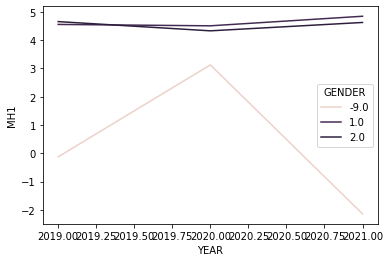

In [ ]:
import pandas as pd
import plotly
import plotly.express as px
from urllib.request import urlopen
import json
import plotly.graph_objects as go
import numpy as np
from datetime import datetime as dt


# df_2013 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2013.csv")
# df_2014 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2014.csv")
# df_2015 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2015.csv")
# df_2016 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2016.csv")
# df_2017 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2017.csv")
# df_2018 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2018.csv")

df_2019 = pd.read_csv("https://csprojectdatavisualizationsample50k.s3.us-east-2.amazonaws.com/sample_df.csv").sample(2000)
df_2020 = pd.read_csv("https://csprojectdatavisualizationsample50k.s3.us-east-2.amazonaws.com/sample_df.csv").sample(2000)
df_2021 = pd.read_csv("https://csprojectdatavisualizationsample50k.s3.us-east-2.amazonaws.com/sample_df.csv").sample(2000)

print(df_2019.head())
df_2019_gender = df_2019.groupby(['GENDER']).agg({'MH1':['mean'], 'MH2':['mean'], 'MH3':['mean'],'YEAR':['max']})
df_2020_gender = df_2020.groupby(['GENDER']).agg({'MH1':['mean'], 'MH2':['mean'], 'MH3':['mean'], 'YEAR':['max']})
df_2021_gender = df_2021.groupby(['GENDER']).agg({'MH1':['mean'], 'MH2':['mean'], 'MH3':['mean'],'YEAR':['max']})

# df_2019_gender['YEAR'] = pd.to_datetime(2019, format='%Y')
# df_2020_gender['YEAR'] = pd.to_datetime(2020,format='%Y')
# df_2021_gender['YEAR'] = pd.to_datetime(2021, format='%Y')


df_2019_gender['YEAR'] = int(2019)
df_2020_gender['YEAR'] = int(2020)
df_2021_gender['YEAR'] = int(2021)

print(df_2019_gender['YEAR'])
df_2019_gender['GENDER'] = df_2019_gender.index
df_2020_gender['GENDER'] = df_2020_gender.index
df_2021_gender['GENDER'] = df_2021_gender.index

df_2019_gender.columns = df_2019_gender.columns.get_level_values(0)
df_2020_gender.columns = df_2020_gender.columns.get_level_values(0)
df_2021_gender.columns = df_2021_gender.columns.get_level_values(0)




# df_2019_gender.set_index(['YEAR'], inplace=True)


pieces = (df_2019_gender, df_2020_gender, df_2021_gender)
final_df = pd.DataFrame(np.concatenate([df_2019_gender.values, df_2020_gender.values,df_2021_gender.values]), columns = df_2019_gender.columns)
print(final_df.head(10))

# df_2019_gender['YEAR'] = '2019'
# df_2020_gender['YEAR'] = '2020'
# df_2021_gender['YEAR'] = 2021

# # print(df_2019_gender.head(5))
sns.lineplot(data=final_df, x="YEAR", y="MH1", hue="GENDER")
# sns.barplot(data=df_2020_gender, x="YEAR", y="MH1", hue=df_2020_gender.index)




Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
        MH1       MH2       MH3    YEAR  GENDER
0  3.135757 -3.176618 -7.919613  2013.0    -9.0
1  4.615719 -2.037496 -7.191971  2013.0     1.0
2  4.373417 -2.343198 -7.329273  2013.0     2.0
3  3.544279 -4.745384 -8.168144  2014.0    -9.0
4  4.569655 -2.418401 -7.007838  2014.0     1.0
5  4.311861 -2.668898 -7.126422  2014.0     2.0
6  4.688736 -3.815727 -7.323918  2015.0    -9.0
7  4.383174 -2.090945 -6.817125  2015.0     1.0
8  4.113997 -2.328709 -6.902208  2015.0     2.0
9  2.860016 -7.037271 -8.371724  2016.0    -9.0


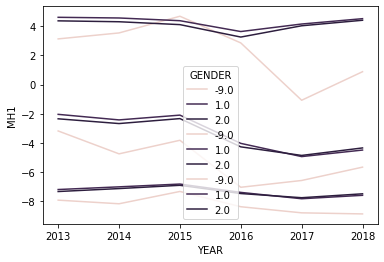

In [ ]:
import pandas as pd
import plotly
import plotly.express as px
from urllib.request import urlopen
import json
import plotly.graph_objects as go
import numpy as np
from datetime import datetime as dt
from google.colab import drive
import seaborn as sns

# Mount your Drive to the Colab VM.
drive.mount('/drive')


df_2013 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2013.csv")
df_2014 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2014.csv")
df_2015 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2015.csv")
df_2016 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2016.csv")
df_2017 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2017.csv")
df_2018 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2018.csv")

df_2013_gender = df_2013.groupby(['GENDER']).agg({'MH1':['mean'], 'MH2':['mean'], 'MH3':['mean'],'YEAR':['max']})
df_2014_gender = df_2014.groupby(['GENDER']).agg({'MH1':['mean'], 'MH2':['mean'], 'MH3':['mean'], 'YEAR':['max']})
df_2015_gender = df_2015.groupby(['GENDER']).agg({'MH1':['mean'], 'MH2':['mean'], 'MH3':['mean'],'YEAR':['max']})
df_2016_gender = df_2016.groupby(['GENDER']).agg({'MH1':['mean'], 'MH2':['mean'], 'MH3':['mean'],'YEAR':['max']})
df_2017_gender = df_2017.groupby(['GENDER']).agg({'MH1':['mean'], 'MH2':['mean'], 'MH3':['mean'], 'YEAR':['max']})
df_2018_gender = df_2018.groupby(['GENDER']).agg({'MH1':['mean'], 'MH2':['mean'], 'MH3':['mean'],'YEAR':['max']})



df_2013_gender['YEAR'] = 2013
df_2014_gender['YEAR'] = 2014
df_2015_gender['YEAR'] = 2015
df_2016_gender['YEAR'] = 2016
df_2017_gender['YEAR'] = 2017
df_2018_gender['YEAR'] = 2018

df_2013_gender['GENDER'] = df_2013_gender.index
df_2014_gender['GENDER'] = df_2014_gender.index
df_2015_gender['GENDER'] = df_2015_gender.index
df_2016_gender['GENDER'] = df_2016_gender.index
df_2017_gender['GENDER'] = df_2017_gender.index
df_2018_gender['GENDER'] = df_2018_gender.index



df_2013_gender.columns = df_2013_gender.columns.get_level_values(0)
df_2014_gender.columns = df_2014_gender.columns.get_level_values(0)
df_2015_gender.columns = df_2015_gender.columns.get_level_values(0)
df_2016_gender.columns = df_2016_gender.columns.get_level_values(0)
df_2017_gender.columns = df_2017_gender.columns.get_level_values(0)
df_2018_gender.columns = df_2018_gender.columns.get_level_values(0)


# df_2019_gender.set_index(['YEAR'], inplace=True)


pieces = (df_2013_gender, df_2014_gender, df_2015_gender, df_2016_gender, df_2017_gender, df_2018_gender)

final_df = pd.DataFrame(np.concatenate([df_2013_gender.values, df_2014_gender.values, df_2015_gender.values, df_2016_gender.values, df_2017_gender.values, df_2018_gender.values]), columns = df_2018_gender.columns)
print(final_df.head(10))

final_df.to_csv('/drive/My Drive/final_gender_df_csv')
# df_2019_gender['YEAR'] = '2019'
# df_2020_gender['YEAR'] = '2020'
# df_2021_gender['YEAR'] = 2021

# # print(df_2019_gender.head(5))
sns.lineplot(data=final_df, x="YEAR", y="MH1", hue="GENDER")
sns.lineplot(data=final_df, x="YEAR", y="MH2", hue="GENDER")
sns.lineplot(data=final_df, x="YEAR", y="MH3", hue="GENDER")
# sns.barplot(data=df_2020_gender, x="YEAR", y="MH1", hue=df_2020_gender.index)


